In [1]:
import matplotlib.pyplot as plt 
import numpy as np 

Definition of the k_armed bandit with eps sampling strategy

In [18]:
def k_armed_bandit(k, num_of_iter, eps, means, std_dev, eps_decay=None):
    all_values = np.zeros((k, num_of_iter))
    no_of_samples = np.zeros(k)
    total_reward = np.zeros(num_of_iter)
    total_regret = np.zeros(num_of_iter)

    for i in range(k):
        all_values[i][0] = np.random.normal(loc=means[i], scale=std_dev[i])
        no_of_samples[i] += 1

    total_reward[0] = np.sum(all_values[0, :], axis=0)
    total_regret[0] = k * np.max(means) - total_reward[0]

    if eps_decay is None: 
        eps_decay = lambda i, num_of_iterations, eps: eps

    for i in range(1, num_of_iter):
        eps_yes_no = np.random.uniform(0,1)
        if eps_yes_no <= eps_decay(i, num_of_iter, eps): 
            current_bandit = int(np.floor(np.random.uniform(0,1) * k))
            no_of_samples[current_bandit] += 1
            all_values[current_bandit, i] = np.random.normal(loc=means[current_bandit], scale=std_dev[current_bandit])

        else: 
            current_bandit = np.argmax(np.sum(all_values[:, :i], axis=1) / no_of_samples)
            no_of_samples[current_bandit] += 1
            all_values[current_bandit, i] = np.random.normal(loc=means[current_bandit], scale=std_dev[current_bandit])
        
        total_reward[i] = total_reward[i-1] + all_values[current_bandit, i]
        total_regret[i] = total_regret[i-1] + (np.max(means) - all_values[current_bandit, i])
    

    return all_values, total_reward, total_regret, no_of_samples

In [69]:
def averageraging_plotting(k,num_of_iter,eps,num_of_avg, means, std_dev):
    all_values = np.zeros((k, num_of_iter))
    total_reward = np.zeros(num_of_iter)
    total_regret = np.zeros(num_of_iter)
    total_number_of_samples = np.zeros(k)

    for i in range(num_of_avg):
        all_values_i, total_reward_i, total_regret_i, number_of_samples_i = k_armed_bandit(k, num_of_iter,eps,means,std_dev)
        all_values += all_values_i
        total_reward += total_reward_i
        total_regret += total_regret_i
        total_number_of_samples += number_of_samples_i

    all_values = all_values/num_of_avg
    total_reward = total_reward/num_of_avg
    total_regret = total_regret/num_of_avg
    total_number_of_samples = total_number_of_samples/num_of_avg
    best_percantage = total_number_of_samples[0]/num_of_iter
    print("The best bandit was selected", best_percantage*100,"% of the time.")
    plt.plot(np.linspace(0, num_of_iter-1, num_of_iter), total_reward, label='gesammelte Belohnung')
    plt.plot(np.linspace(0, num_of_iter-1, num_of_iter), means[0]*np.linspace(1, num_of_iter, num_of_iter) + (k-1)*max(means), label='maximaler reward')
    plt.plot(np.linspace(0, num_of_iter-1, num_of_iter), total_regret, label='verlust')

    plt.legend()
    plt.show()
    return total_reward[-1], total_regret[-1], best_percantage
    

Some initial parameters that we tried 

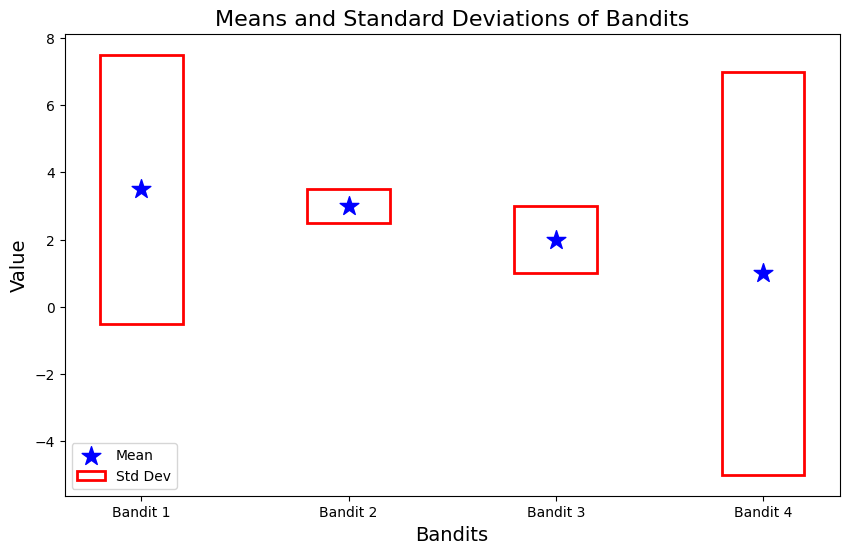

In [70]:
means = np.array([3.5, 3, 2, 1])
std_dev = np.array([4, 0.5, 1, 6])
bandits = ['Bandit 1', 'Bandit 2', 'Bandit 3', 'Bandit 4']

# Scatter Plot mit Sternen für die Mittelwerte und Boxen für die Standardabweichungen

fig, ax = plt.subplots(figsize=(10, 6))

# Mittelwerte als Sterne plotten
ax.scatter(bandits, means, color='blue', marker='*', s=200, label='Mean')

# Boxen für die Standardabweichungen
for i in range(len(bandits)):
    ax.add_patch(plt.Rectangle((i - 0.2, means[i] - std_dev[i]), 0.4, 2 * std_dev[i], 
                               edgecolor='red', facecolor='none', lw=2, label='Std Dev' if i == 0 else ""))

# Titel und Achsenbeschriftungen
ax.set_title('Means and Standard Deviations of Bandits', fontsize=16)
ax.set_xlabel('Bandits', fontsize=14)
ax.set_ylabel('Value', fontsize=14)
ax.legend()

plt.show()


Running the multi-armed Bandit num_of_avg times to determine trustfull results

In [77]:
k = 4 
num_of_iter = 10000
eps = 0.1

num_of_avg = 1000

The best bandit was selected 81.63597 % of the time.


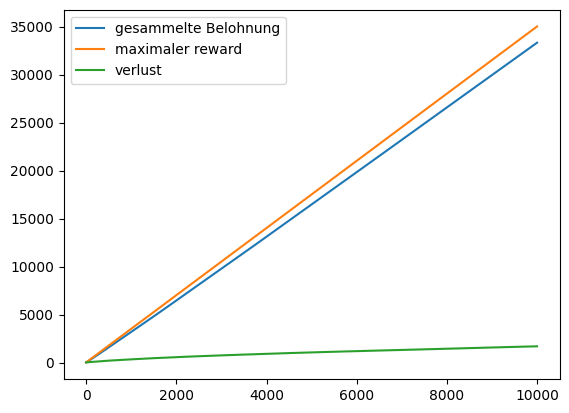

In [78]:
reward_e01, regret_e01, best_perc_e01 = averageraging_plotting(k,num_of_iter,eps,num_of_avg,means,std_dev)

# Variation von $\epsilon$

In [79]:
k = 4 
num_of_iter = 10000
eps = 0.01
num_of_avg = 1000

The best bandit was selected 55.38744 % of the time.


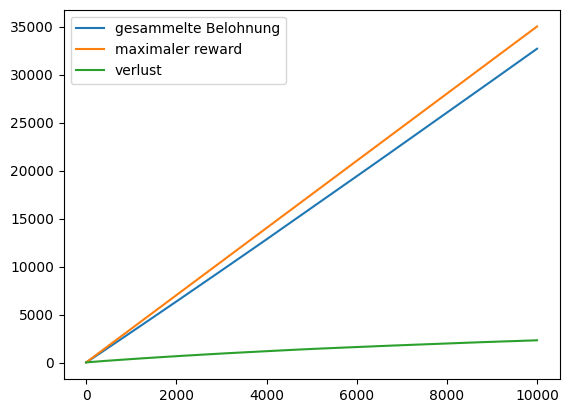

In [80]:
reward_e001, regret_e001, best_perc_e001 = averageraging_plotting(k,num_of_iter,eps,num_of_avg,means,std_dev)

$\epsilon$ = 0.2

In [81]:
k = 4 
num_of_iter = 10000
eps = 0.2
num_of_avg = 1000

The best bandit was selected 79.97462 % of the time.


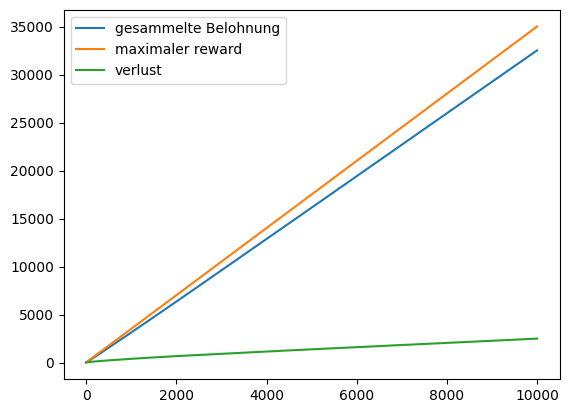

In [82]:
reward_e02, regret_e02, best_perc_e02 = averageraging_plotting(k,num_of_iter,eps,num_of_avg,means,std_dev)

# d

In [6]:
linear_decay_eps = lambda i, num_of_iterations, eps: eps - (eps/num_of_iterations) * (i-1)
exp_decay_eps = lambda i, num_of_iterations, eps: eps * np.exp(- (i-1))

In [7]:
all_values = np.zeros((k, num_of_iter))
total_reward = np.zeros(num_of_iter)
total_regret = np.zeros(num_of_iter)

for i in range(num_of_avg):
    all_values_i, total_reward_i, total_regret_i = k_armed_bandit(k, num_of_iter,eps,means,std_dev, eps_decay=linear_decay_eps)
    all_values += all_values_i
    total_reward += total_reward_i
    total_regret += total_regret_i

all_values = all_values/num_of_avg
total_reward = total_reward/num_of_avg
total_regret = total_regret/num_of_avg

[8566. 1144.  134.  159.]
[9588.  143.  120.  152.]
[8975.  759.  136.  133.]
[8981.  763.  129.  130.]
[9609.  152.  118.  124.]
[9635.  100.  117.  151.]
[ 185. 9581.  122.  115.]
[9628.  130.  130.  115.]
[3299. 6441.  142.  121.]
[7665. 2110.  107.  121.]


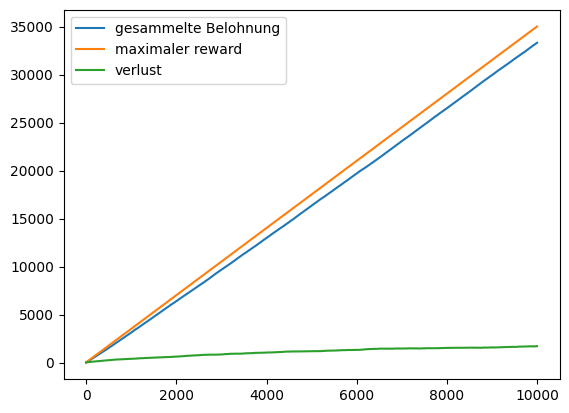

In [8]:
plt.plot(np.linspace(0, num_of_iter-1, num_of_iter), total_reward, label='gesammelte Belohnung')
plt.plot(np.linspace(0, num_of_iter-1, num_of_iter), means[0]*np.linspace(1, num_of_iter, num_of_iter) + (k-1)*max(means), label='maximaler reward')
plt.plot(np.linspace(0, num_of_iter-1, num_of_iter), total_regret, label='verlust')

plt.legend()
plt.show()

In [9]:
all_values = np.zeros((k, num_of_iter))
total_reward = np.zeros(num_of_iter)
total_regret = np.zeros(num_of_iter)

for i in range(num_of_avg):
    all_values_i, total_reward_i, total_regret_i = k_armed_bandit(k, num_of_iter,eps,means,std_dev, eps_decay=exp_decay_eps)
    all_values += all_values_i
    total_reward += total_reward_i
    total_regret += total_regret_i

all_values = all_values/num_of_avg
total_reward = total_reward/num_of_avg
total_regret = total_regret/num_of_avg

[9.991e+03 1.000e+00 1.000e+00 1.000e+01]
[1.e+00 1.e+04 1.e+00 1.e+00]
[1.e+04 1.e+00 1.e+00 1.e+00]
[9.996e+03 3.000e+00 1.000e+00 3.000e+00]
[1.000e+00 9.992e+03 2.000e+00 8.000e+00]
[1.e+00 1.e+04 1.e+00 1.e+00]
[1.e+00 1.e+04 1.e+00 1.e+00]
[1.e+04 1.e+00 1.e+00 1.e+00]
[1.e+00 1.e+04 1.e+00 1.e+00]
[1.000e+00 9.978e+03 1.000e+00 2.300e+01]


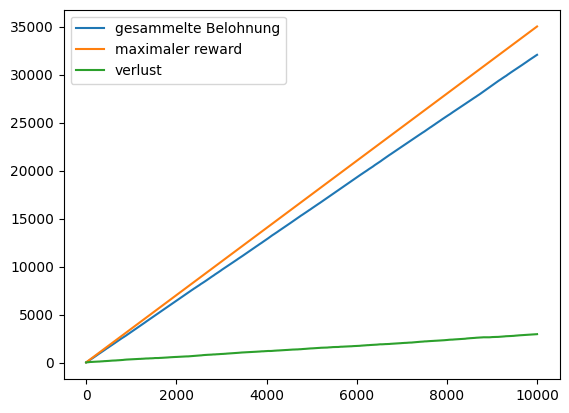

In [10]:
plt.plot(np.linspace(0, num_of_iter-1, num_of_iter), total_reward, label='gesammelte Belohnung')
plt.plot(np.linspace(0, num_of_iter-1, num_of_iter), means[0]*np.linspace(1, num_of_iter, num_of_iter) + (k-1)*max(means), label='maximaler reward')
plt.plot(np.linspace(0, num_of_iter-1, num_of_iter), total_regret, label='verlust')

plt.legend()
plt.show()

# Non stationary multi-armed Bandit

In [11]:
def non_stationary_k_armed_bandit(k, num_of_iter, eps, means, std_dev, eps_decay=None):
    means_vec = np.zeros((k,num_of_iter))
    all_values = np.zeros((k, num_of_iter))
    no_of_samples = np.zeros(k)
    total_reward = np.zeros(num_of_iter)
    total_regret = np.zeros(num_of_iter)
    best_mean = np.zeros(num_of_iter)
    selected_bandit = np.zeros(num_of_iter)

    for i in range(k):
        all_values[i][0] = np.random.normal(loc=means[i], scale=std_dev[i])
        no_of_samples[i] += 1
        means_vec[i,0] = all_values[i,0]

    total_reward[0] = np.sum(all_values[0, :], axis=0)
    total_regret[0] = k * np.max(means) - total_reward[0]

    if eps_decay is None: 
        eps_decay = lambda i, num_of_iterations, eps: eps

    for i in range(1, num_of_iter):
        means += np.random.normal(loc=0, scale=0.05, size=4)
        best_mean[i] = np.max(means)
        means_vec[:, i] = means.T
        eps_yes_no = np.random.uniform(0,1)

        if eps_yes_no <= eps_decay(i, num_of_iter, eps): 
            current_bandit = int(np.floor(np.random.uniform(0,1) * k))
            selected_bandit[i] = current_bandit
            no_of_samples[current_bandit] += 1
            all_values[current_bandit, i] = np.random.normal(loc=means[current_bandit], scale=std_dev[current_bandit])
        else: 
            current_bandit = np.argmax(np.sum(all_values[:, :i], axis=1) / no_of_samples)
            selected_bandit[i] = current_bandit
            no_of_samples[current_bandit] += 1
            all_values[current_bandit, i] = np.random.normal(loc=means[current_bandit], scale=std_dev[current_bandit])
        
        total_reward[i] = total_reward[i-1] + all_values[current_bandit, i]
        total_regret[i] = total_regret[i-1] + (np.max(means) - all_values[current_bandit, i])

    print(no_of_samples)
    return all_values, total_reward, total_regret, means_vec, best_mean, selected_bandit

In [12]:
k = 4 
num_of_iter = 10000
eps = 0.3
means = np.array([4.0, 3.0, 2.0, 1.0])
std_dev = np.array([4., 0.5, 1, 6])

num_of_avg = 1

In [13]:
all_values = np.zeros((k, num_of_iter))
total_reward = np.zeros(num_of_iter)
total_regret = np.zeros(num_of_iter)
best_mean = np.zeros(num_of_iter)
means_vec = np.zeros((k,num_of_iter))
selected_bandit = np.zeros(num_of_iter)

for i in range(num_of_avg):
    means = np.array([4.0, 3.0, 2.0, 1])
    all_values_i, total_reward_i, total_regret_i, means_vec_i, best_mean_i, selected_bandit_i = non_stationary_k_armed_bandit(k, num_of_iter,eps,means,std_dev)
    all_values += all_values_i
    total_reward += total_reward_i
    total_regret += total_regret_i
    best_mean += best_mean_i
    means_vec += means_vec_i
    selected_bandit += selected_bandit_i

all_values = all_values/num_of_avg
total_reward = total_reward/num_of_avg
total_regret = total_regret/num_of_avg
best_mean = best_mean/num_of_avg
means_vec = means_vec/num_of_avg
selected_bandit = selected_bandit/num_of_avg

[1443.  772. 7050.  738.]


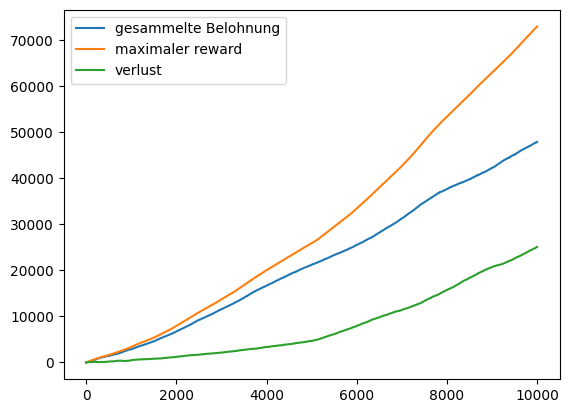

In [14]:
plt.plot(np.linspace(0, num_of_iter-1, num_of_iter), total_reward, label='gesammelte Belohnung')
plt.plot(np.linspace(0, num_of_iter-1, num_of_iter), np.cumsum(best_mean), label='maximaler reward')
plt.plot(np.linspace(0, num_of_iter-1, num_of_iter), total_regret, label='verlust')

plt.legend()
plt.show()


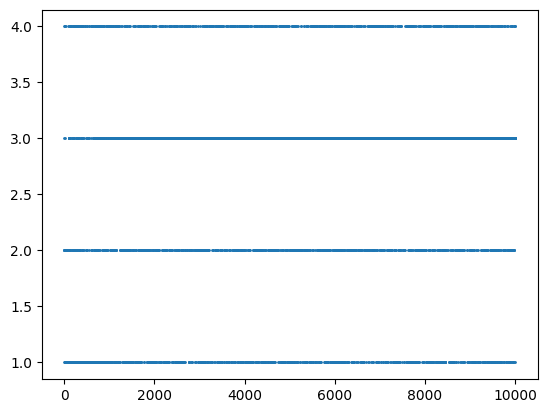

In [15]:
plt.plot(np.linspace(1,num_of_iter - 1, num_of_iter - 1), selected_bandit[1:] + 1, 'o', markersize=1)
plt.show()

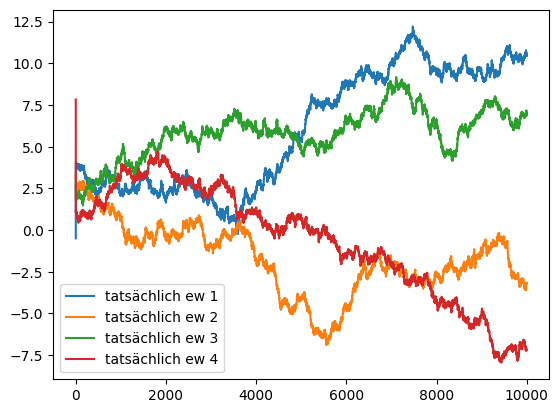

In [16]:
plt.plot(np.linspace(0, num_of_iter-1, num_of_iter), means_vec[0], label='tatsächlich ew 1')
plt.plot(np.linspace(0, num_of_iter-1, num_of_iter), means_vec[1], label='tatsächlich ew 2')
plt.plot(np.linspace(0, num_of_iter-1, num_of_iter), means_vec[2], label='tatsächlich ew 3')
plt.plot(np.linspace(0, num_of_iter-1, num_of_iter), means_vec[3], label='tatsächlich ew 4')
plt.legend()
plt.show()

c) 

np.array([4, 3, 2, 1])